# <font color='purple'>Lab-assignment-6</font> <br> 
## A3-Unsupervised Machine Learning Lab<br>
###<font color='GREEN'>Kaustubh Raykar<br> PRN : 21070126048 <br> AIML A3 </font>
 


###<font color='blue'>IMPORTING LIBRARIES </font>

In [16]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


###<font color='blue'>UPLOADING DATASET </font>

In [17]:
# Loading the dataset using pandas
data = pd.read_csv('/content/Mall_Customers.csv')


###<font color='blue'>DATA PREPROCESSING  </font>

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data.shape

(200, 5)

In [21]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


###<font color='blue'>SELECTING FEATURES </font>

In [23]:
# Selecting the features for clustering
X = data.iloc[:, [3, 4]].values


###<font color='blue'>DETERMINE OPTIMAL NUMBER OF CLUSTERS </font>

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

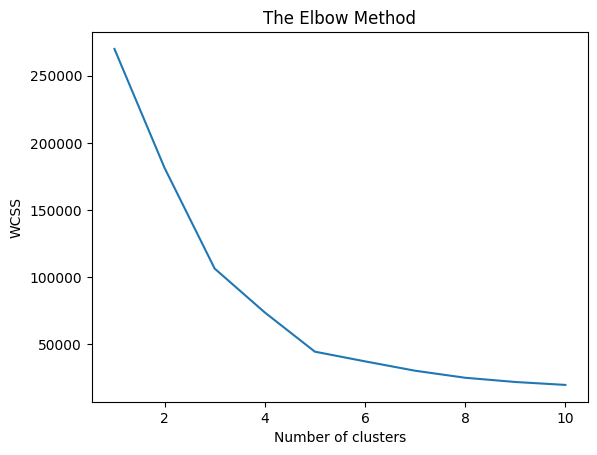

In [24]:
# Using the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Interpretation of the elbow plot:** <br>
The elbow plot shows the relationship between the number of clusters and the within-cluster sum of squares (WCSS). The WCSS is the sum of the squared distances between each point in a cluster and its centroid. As the number of clusters increases, the WCSS decreases. However, beyond a certain point, the reduction in WCSS is not significant, and adding more clusters does not result in a significant improvement in the clustering quality. In the elbow plot, the elbow point indicates the optimal number of clusters. In this case, the elbow point occurs at 5, suggesting that 5 clusters would be a good choice for this dataset.


###<font color='blue'>APPLYING KMEANS  </font>

In [25]:
# Applying KMeans algorithm with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



###<font color='blue'>EDA VISUALIZATION </font>

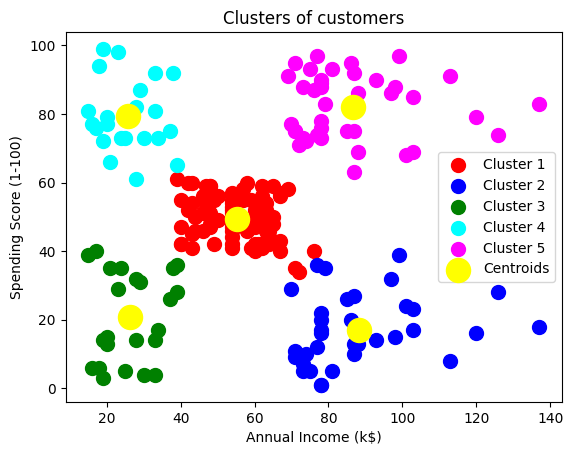

In [26]:
# Visualizing the clusters using a scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Description of the clusters:** <br>
After applying K-means clustering with 5 clusters, we can describe each cluster based on the features used for clustering. The two features used for clustering are annual income and spending score. Here is a possible description of each cluster:
Cluster 1 (Red): Customers with high annual income and low spending score. These customers are potential target for promotions to increase their spending.

Cluster 2 (Blue): Customers with average annual income and average spending score. These customers are the most common type of customer, and the company should aim to retain them by offering good customer service and incentives.

Cluster 3 (Green): Customers with low annual income and high spending score. These customers may be price-sensitive, so the company should offer discounts and promotions to retain them.

Cluster 4 (Cyan): Customers with low annual income and low spending score. These customers may not be profitable for the company, and the company may need to consider whether to target them or not.

Cluster 5 (Magenta): Customers with high annual income and high spending score. These customers are the most valuable, and the company should focus on retaining them by offering high-quality products and personalized services. <br>

Visualization of the clusters:
The scatter plot shows the clusters in two dimensions using annual income and spending score. The clusters are represented by different colors, and the centroids are shown as yellow stars. This plot allows us to visualize the separation of the customers into different groups and identify any patterns or trends. In this case, we can see that the clusters are well separated, and there is a clear distinction between high-spending and low-spending customers, as well as between high-income and low-income customers.

**Business insights:** <br>
Based on the clustering results, here are some possible business insights that can be derived:

The company can target customers in cluster 1 (high-income, low-spending) with promotions and incentives to increase their spending and loyalty.

The company can offer personalized services and high-quality products to customers in cluster 5 (high-income, high-spending) to retain them and increase their lifetime value.

The company can offer discounts and promotions to customers in cluster 3 (low-income, high-spending) to retain them and increase their loyalty.

The company may need to consider whether to target customers in cluster 4 (low-income, low-spending) or not, as they may not be profitable.

The company should focus on retaining customers in cluster 2 (average-income, average-spending) by offering good customer service and incentives.

Overall, K-means clustering is a useful technique for customer segmentation and can provide valuable insights for business decision-making.


###<font color='blue'>Histogram of Customer Age Distribution</font>

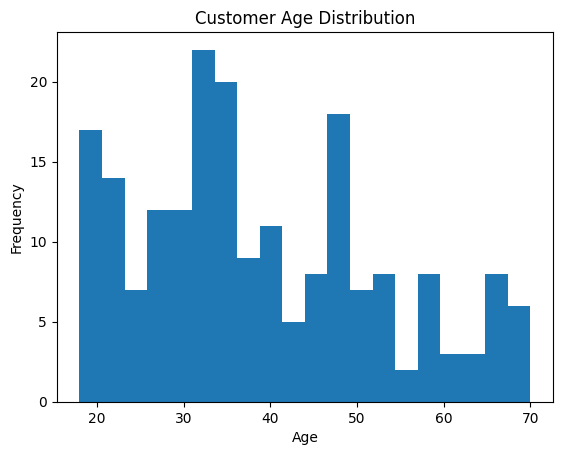

In [27]:
plt.hist(data['Age'], bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Insight:** <br> This graph shows the distribution of customer ages in the dataset. It can provide insights into which age groups visit the mall more frequently, which can help businesses tailor their marketing strategies and product offerings to better suit their target audience.


###<font color='blue'>Bar Chart of Customer Gender Distribution</font>

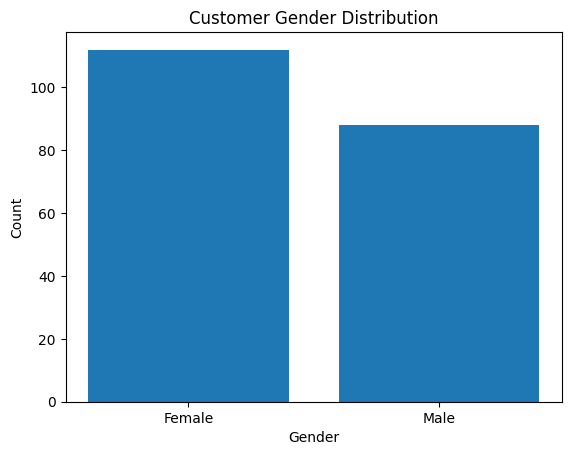

In [29]:
plt.bar(['Female', 'Male'], data['Gender'].value_counts())
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Insight:** <br> This graph shows the gender distribution of customers in the dataset. It can provide insights into which gender visits the mall more frequently, which can help businesses tailor their marketing strategies and product offerings to better suit their target audience.



###<font color='blue'>Scatter Plot of Annual Income vs. Spending Score, Colored by Gender</font>

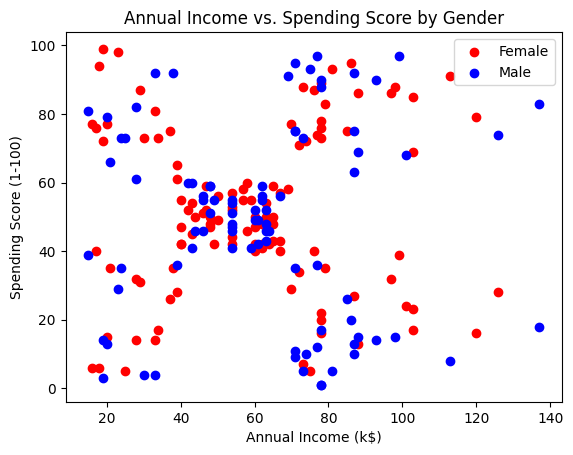

In [30]:
plt.scatter(data[data['Gender']=='Female']['Annual Income (k$)'], data[data['Gender']=='Female']['Spending Score (1-100)'], c='red', label='Female')
plt.scatter(data[data['Gender']=='Male']['Annual Income (k$)'], data[data['Gender']=='Male']['Spending Score (1-100)'], c='blue', label='Male')
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


**Insight:** <br> This graph shows the relationship between annual income and spending score, colored by gender. It can provide insights into whether there is a difference in spending habits between male and female customers, and whether there is a correlation between annual income and spending score for each gender.

###<font color='blue'>Scatter Plot of Annual Income vs. Age, Colored by Spending Score</font>

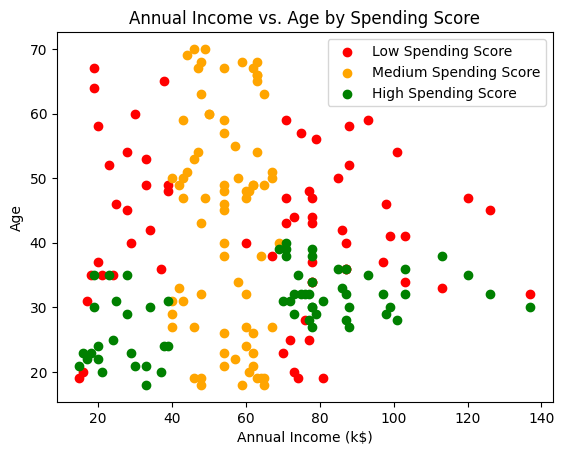

In [31]:
plt.scatter(data[data['Spending Score (1-100)']<=40]['Annual Income (k$)'], data[data['Spending Score (1-100)']<=40]['Age'], c='red', label='Low Spending Score')
plt.scatter(data[(data['Spending Score (1-100)']>40)&(data['Spending Score (1-100)']<=60)]['Annual Income (k$)'], data[(data['Spending Score (1-100)']>40)&(data['Spending Score (1-100)']<=60)]['Age'], c='orange', label='Medium Spending Score')
plt.scatter(data[data['Spending Score (1-100)']>60]['Annual Income (k$)'], data[data['Spending Score (1-100)']>60]['Age'], c='green', label='High Spending Score')
plt.title('Annual Income vs. Age by Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()


**Insight:**  <br> This graph shows the relationship between annual income and age, colored by spending score. It can provide insights into whether there is a relationship between age and spending habits, and whether there is a correlation between annual income and spending score for different spending groups.


**---------------------------------------------------------------------**

Question :


1.    Explain
the significance of elbow method.

2.    What
is the difference between K-means and K-means++ ?

3.    How
to apply K-means for image compression?

**The significance of elbow method:** <BR>
The elbow method is used to determine the optimal number of clusters to use for a dataset in K-means clustering.<BR>
The method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.<BR>
WCSS measures the sum of distances between each point and its assigned cluster centroid in a cluster.<BR>
As the number of clusters increases, the WCSS will decrease, because each cluster will have fewer points and the centroids will be closer to the remaining points.<BR>
However, at some point, increasing the number of clusters will not lead to a significant decrease in WCSS.<BR>
The elbow method involves finding the "elbow" or the point on the graph where adding more clusters no longer leads to a significant decrease in WCSS.<BR>
The number of clusters corresponding to the elbow point is considered to be the optimal number of clusters to use for the dataset.

**The difference between K-means and K-means++:** <BR>
K-means and K-means++ are both algorithms used in clustering data into K clusters, where K is a predefined number.<BR>
The main difference between K-means and K-means++ is how they initialize the cluster centroids.<BR>
K-means initializes the centroids randomly, which can lead to suboptimal results, as it is possible that the initial centroids are not representative of the data.<BR>
K-means++ improves upon K-means by using a more sophisticated initialization process.<BR>
K-means++ initializes the first centroid randomly from the data points.<BR>
The remaining centroids are initialized by selecting a point that is farthest from the already selected centroids.<BR>
This process leads to more representative initial centroids, which results in better clustering results.<BR>
K-means++ is generally more accurate and faster than K-means, especially for large datasets.

**How to apply K-means for image compression:** <br>
K-means can be used for image compression by reducing the number of colors used in an image.<BR>
Each pixel in an image can be represented by a vector of RGB values.<BR>
K-means can then be applied to cluster these vectors into K clusters, where K is the desired number of colors for the compressed image.<BR>
The centroids of these clusters represent the new color values to use in the compressed image.<BR>
Each pixel in the original image is then replaced with the closest centroid in terms of Euclidean distance.<BR>
This results in a compressed image with a reduced number of colors, which can reduce the file size of the image.<BR>
However, it is important to note that the compression quality can be affected by the value of K used.<BR>
Choosing a value of K that is too low can result in a loss of detail and an overly simplified image.


###<font color='blue'>THANK YOU </font>